# Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Read Data

In [2]:
file = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(file.shape)
#file.head()


(9134, 24)

In [3]:
#file.info()

In [4]:
file.columns = [e.lower().replace(' ', '_') for e in file.columns] # modifying and standardizing columns
file.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
file['effective_to_date'] = pd.to_datetime(file['effective_to_date']) # modifying datetime
# file['day'] = file['effective_to_date'].dt.day
# file['month'] = file['effective_to_date'].dt.month
# file['year'] = file['effective_to_date'].dt.year
# months_to_filter = [1, 2, 3]                         
# file[file['month'].isin(months_to_filter)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_9996\680461877.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file['effective_to_date'] = pd.to_datetime(file['effective_to_date']) # modifying datetime


# Creating a New DataFrame for Numerical Variables

In [6]:
 _numerical_df_ =  file.select_dtypes(np.number) # numerical variables
    
 _numerical_df_   

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [7]:

# def descCont(_numerical_df_):
#     descrete_df =_numerical_df_[['income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints',	'number_of_policies']]
#     continuous_df =_numerical_df_[['customer_lifetime_value', 'total_claim_amount']]
#     return descrete_df, continuous_df
# descrete_df, continuous_df = descCont(_numerical_df_)

def descCont(_numerical_df_): # splitting the numerical dataframe into discrete and continuous franes
    continuous_col = []
    discrete_col = []
    for column in _numerical_df_.columns:
        values = _numerical_df_[column]  
        if values.nunique() <= 10 or values.dtype == 'int64':
            discrete_col.append(column)
        else:
             continuous_col.append(column)          
    discrete_df = _numerical_df_ [discrete_col].copy()
    continuous_df = _numerical_df_[continuous_col].copy()
    return discrete_df, continuous_df
#df = pd.DataFrame(_numerical_df_)
discrete_df, continuous_df  = descCont(_numerical_df_)

In [8]:
correlations_matrix = discrete_df.corr()     # correlation matrix to see pairs that influence each other
correlations_matrix


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly_premium_auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


<Axes: >

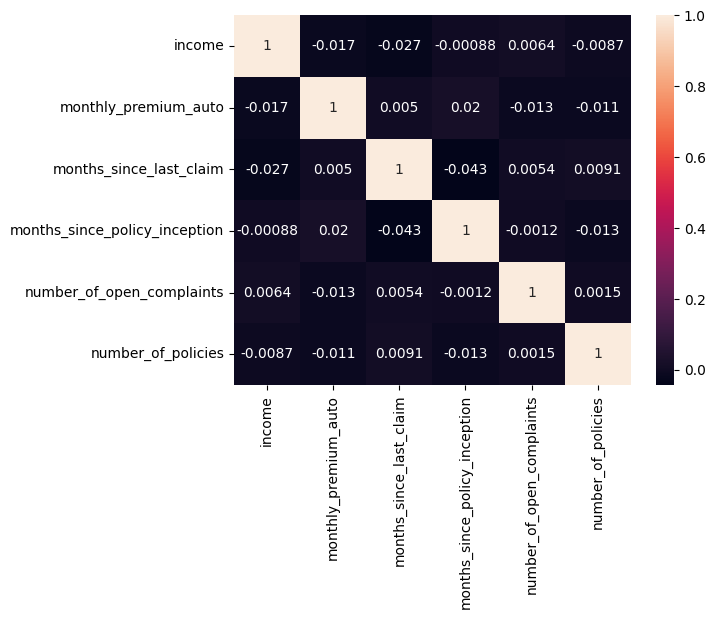

In [9]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation; how the various colimns are related to each other 
#plt.show()

Looking at the correlation matrix, it can be said that correlation between variables is highly low and the 
occurence of multicollinearity is very low; the data can be assume to be a goo fit for regression analysis.

# Plots for Numerical Data

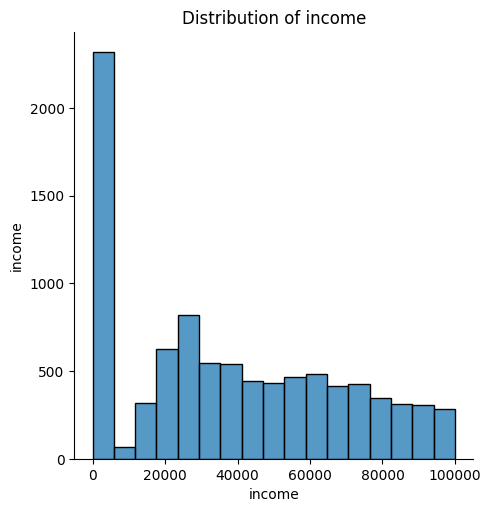

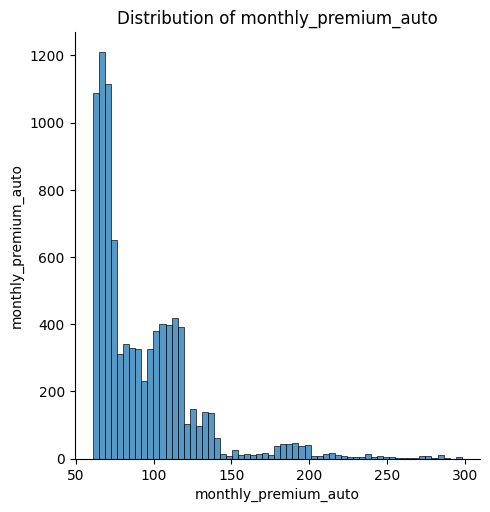

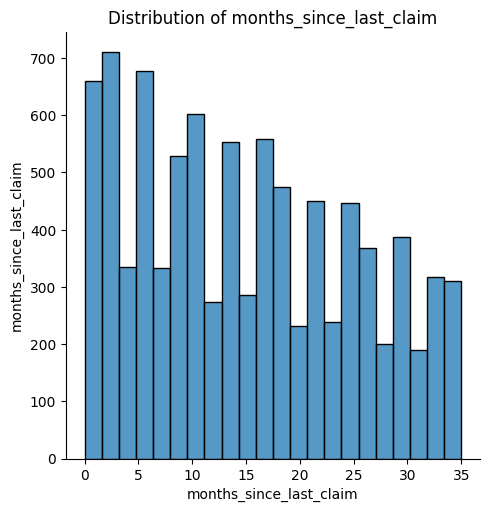

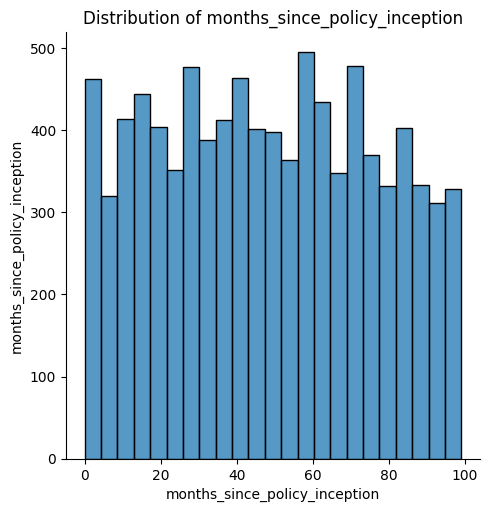

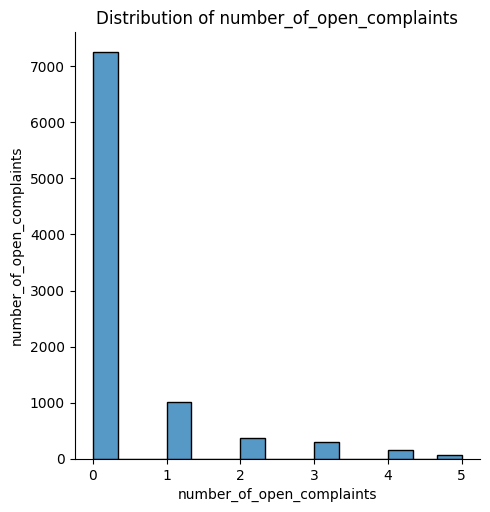

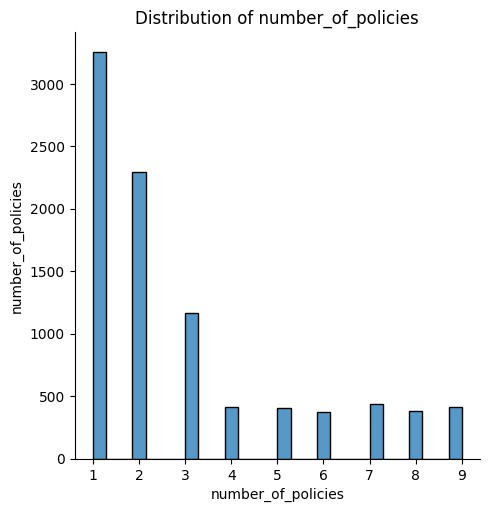

In [10]:
def chartPlots(discrete_df):                         #   # distribution plots for discrete data
    for column in discrete_df.columns:
        sns.displot(discrete_df[column])
        plt.xlabel(column)
        plt.ylabel(column)
        plt.title(f'Distribution of {column}')
        plt.show()
        
df = pd.DataFrame(discrete_df)
chartPlots(df)

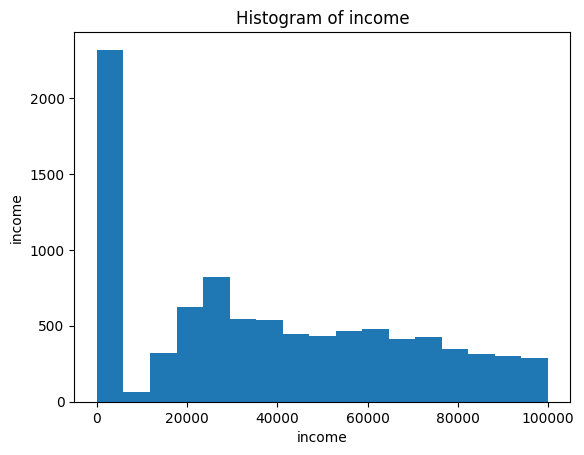

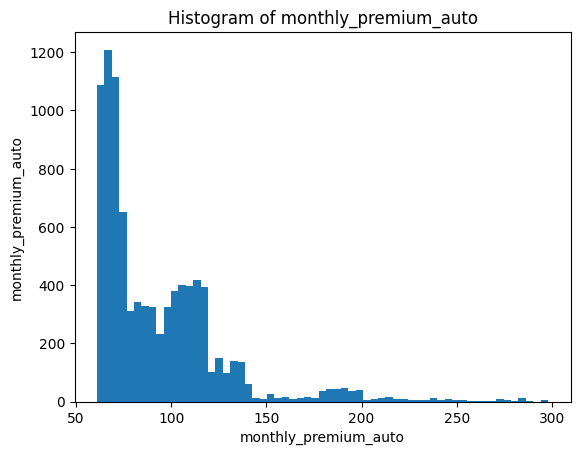

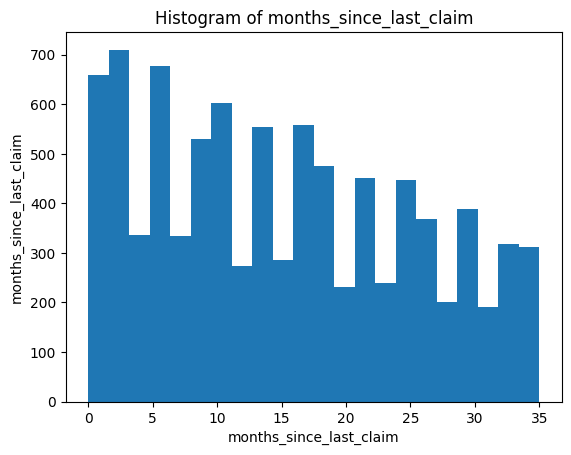

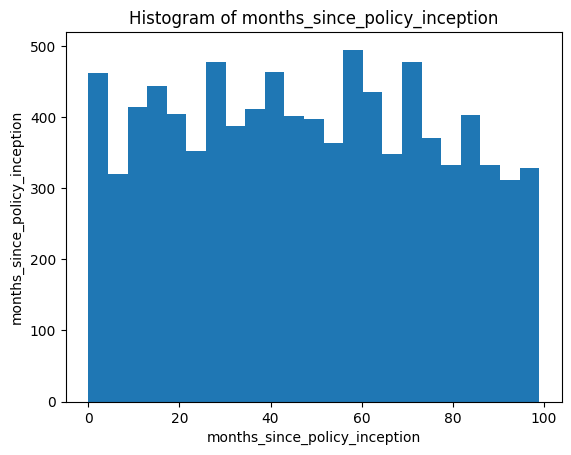

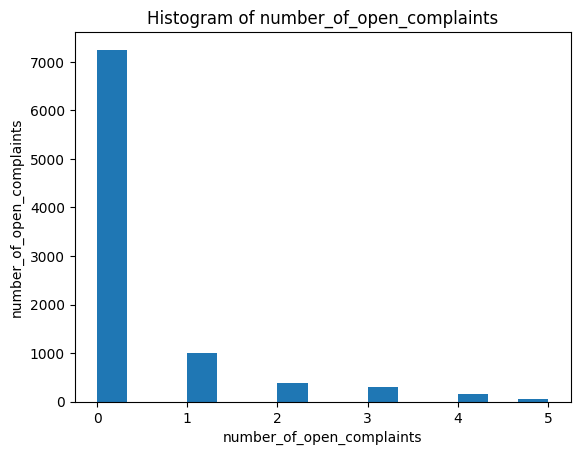

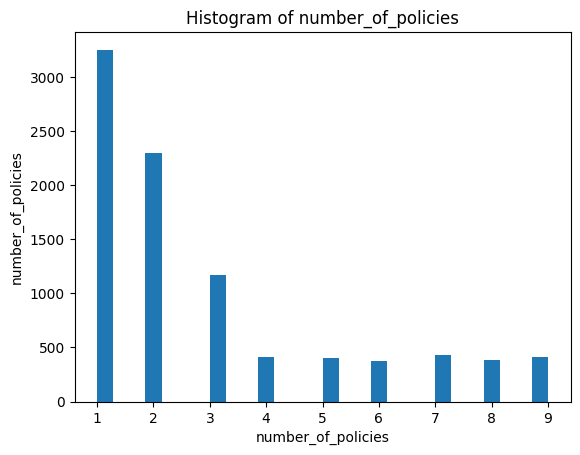

In [11]:
def chartPlots(discrete_df):                                # histogram plots for discrete data
    for column in discrete_df.columns:
        fig, ax = plt.subplots()
        plt.hist(discrete_df[column], bins = 'auto')
        plt.xlabel(column)
        plt.ylabel(column)
        plt.title(f'Histogram of {column}')
        plt.show()
        
df = pd.DataFrame(discrete_df)
chartPlots(df)
        
# fig, ax = plt.subplots()
# for column in discrete_df.columns:
#     plt.gca().set(xlabel= column,ylabel='total_claim_amount')
#     sns.histplot(discrete_df[column], bins = 10,kde=True)
#     plt.show()

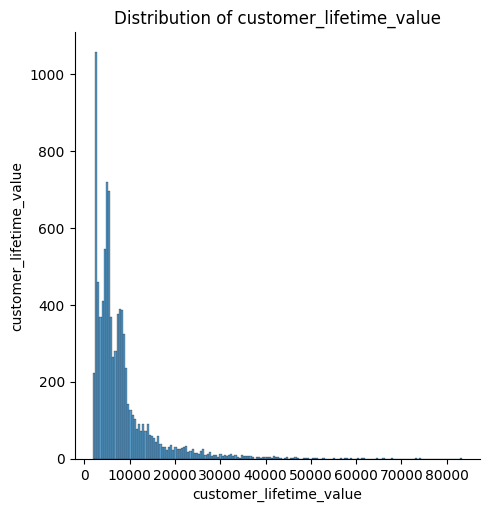

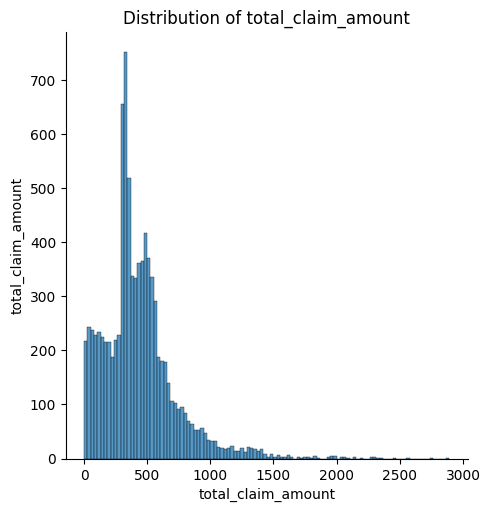

In [12]:
def chartPlots(continuous_df):               # distribution plots for continuous data
    for column in continuous_df.columns:
        sns.displot(continuous_df[column])
        plt.xlabel(column)
        plt.ylabel(column)
        plt.title(f'Distribution of {column}')
        plt.show()
        
chartPlots(continuous_df)
        

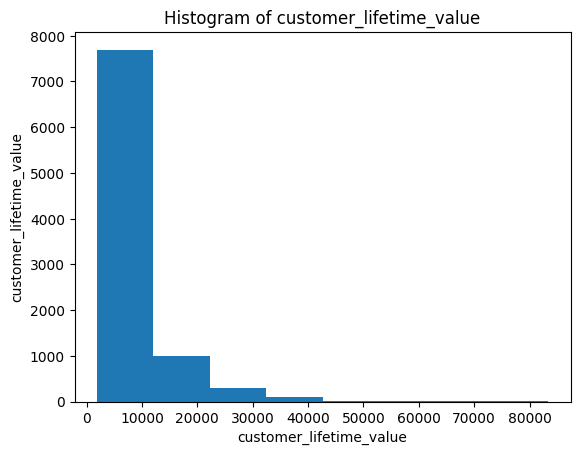

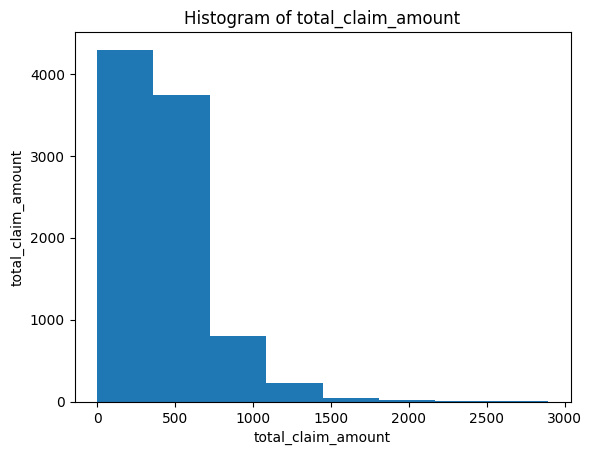

In [13]:
def chartPlots(continuous_df):                             # histogram plots for continuous data
    for column in continuous_df.columns:
        plt.hist(continuous_df[column], bins = 8)
        plt.xlabel(column)
        plt.ylabel(column)
        plt.title(f'Histogram of {column}')
        plt.show()
        
#bins = [0, 1, 2, 3, 4, 5]       
#df = pd.DataFrame(continuous_df)
chartPlots(continuous_df)

Majority of the data distribution are skewed and the shappe of soem of the histograms suggest concentration of values and possible presence of outliers

# Checking for Outliers

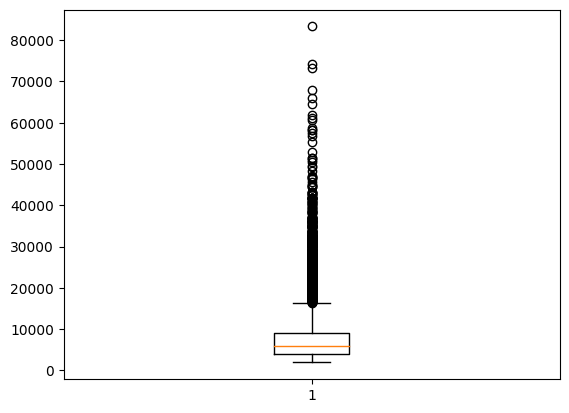

In [14]:
plt.boxplot(continuous_df['customer_lifetime_value']) # box plots for continuous data (customer_lifetime_value)
plt.show()

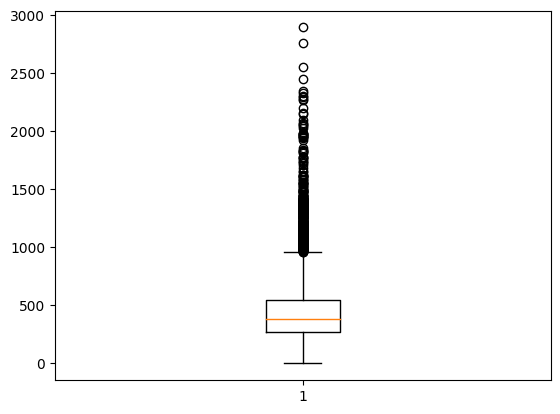

In [15]:
plt.boxplot(continuous_df['total_claim_amount'])    # box plots for continuous data (total_claim_amount)
plt.show()

The boxplots above show the presence of outlies as represented by the circles above the thresholds of Q1, Q3, Q5.

In [16]:
print(continuous_df['customer_lifetime_value'].quantile(0.10))    # confirming  and correcting outliers for continuous data
print(continuous_df['customer_lifetime_value'].quantile(0.90))

2661.7578346
15433.385306000006


In [17]:
continuous_df['customer_lifetime_value'] = np.where(continuous_df['customer_lifetime_value'] < 2661.7578, 2661.7578, continuous_df['customer_lifetime_value'])
continuous_df['customer_lifetime_value'] = np.where(continuous_df['customer_lifetime_value'] > 15433.3853, 15433.3853, continuous_df['customer_lifetime_value'])
print(continuous_df['customer_lifetime_value'].skew())
                                                                

0.8822349651752874


In [18]:
print(continuous_df['total_claim_amount'].quantile(0.10))  # confirming and correcting outliers for continuous data
print(continuous_df['total_claim_amount'].quantile(0.90))

104.08485470000001
773.4335034000001


In [19]:
continuous_df['total_claim_amount'] = np.where(continuous_df['total_claim_amount'] < 104.0848, 104.0848,continuous_df['total_claim_amount'])
continuous_df['total_claim_amount'] = np.where(continuous_df['total_claim_amount'] > 773.4335, 773.4335,continuous_df['total_claim_amount'])
print(continuous_df['total_claim_amount'].skew())
                                                         

0.2504308482054229


# Checking for and Handling NaNs

In [20]:
print(_numerical_df_.isna().any())

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
dtype: bool


In [21]:
_numerical_df_.to_csv('numerical.csv', index = False)     # Saving the Data

# Cleaning Categorical Data

In [22]:
_categorical_df_ =  file.select_dtypes(object)   # extracting and reading categorical data

In [23]:
#_categorical_df_

# Checking and Handling NaN Values

In [24]:
print(_categorical_df_.isna().any())

customer            False
state               False
response            False
coverage            False
education           False
employmentstatus    False
gender              False
location_code       False
marital_status      False
policy_type         False
policy              False
renew_offer_type    False
sales_channel       False
vehicle_class       False
vehicle_size        False
dtype: bool


#  Checking for all Unique Values

In [25]:
def check_categorical_variables(_categorical_df_):
    for col in _categorical_df_.columns:
        unique_values = _categorical_df_[col].unique()
        num_unique_values = len(unique_values)

        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print(f"Number of Unique Values: {num_unique_values}")
        print('\n')

check_categorical_variables(_categorical_df_)

Column: customer
Unique Values: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Number of Unique Values: 9134


Column: state
Unique Values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Number of Unique Values: 5


Column: response
Unique Values: ['No' 'Yes']
Number of Unique Values: 2


Column: coverage
Unique Values: ['Basic' 'Extended' 'Premium']
Number of Unique Values: 3


Column: education
Unique Values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Number of Unique Values: 5


Column: employmentstatus
Unique Values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Number of Unique Values: 5


Column: gender
Unique Values: ['F' 'M']
Number of Unique Values: 2


Column: location_code
Unique Values: ['Suburban' 'Rural' 'Urban']
Number of Unique Values: 3


Column: marital_status
Unique Values: ['Married' 'Single' 'Divorced']
Number of Unique Values: 3


Column: policy_type
Unique Values: ['Corporate Auto' 'Personal Auto' 

# Checking Data Types of the Categorical Data and cleaning

In [26]:
_categorical_df_.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

No! They cannot be said to make sense as categorical data just because they appear to be objects without any of the columns looking ambigous. The data has to be scrutinized to ascertain the actual values and their meanings before any conclusion can be 
made.

In [27]:
_categorical_df_.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Yes! The customer column contains alpha numeric characters and there exist redundant data between Policy Type and Policy, hence, one of the two is dropped.

In [28]:
categorical_df = _categorical_df_.drop(['customer'], axis = 1, inplace = False) # droppin customer because it contains alpha numeric characters

In [29]:
#categorical_df

# Checking and Plotting Data with differing Counts

In [30]:
def check_categorical_variables(categorical_df):    # Checking data counts in order to determine the possibility of merging categories
    for col in categorical_df.columns:
        counts_val = categorical_df[col].value_counts()
        num_counts = len(counts_val)

        print(f"Column: {col}")
        print(f" counts_val: { counts_val}")
        print(f" num_counts: { num_counts}")
        print('\n')

check_categorical_variables(categorical_df)

Column: state
 counts_val: state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
 num_counts: 5


Column: response
 counts_val: response
No     7826
Yes    1308
Name: count, dtype: int64
 num_counts: 2


Column: coverage
 counts_val: coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
 num_counts: 3


Column: education
 counts_val: education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
 num_counts: 5


Column: employmentstatus
 counts_val: employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64
 num_counts: 5


Column: gender
 counts_val: gender
F    4658
M    4476
Name: count, dtype: int64
 num_counts: 2


Column: location_code
 counts_val: location_code
Suburb

YES! Some of the columns have ranges that are far apart, these could appear as outliers if plotted, hence, some data will be merged and some dropped

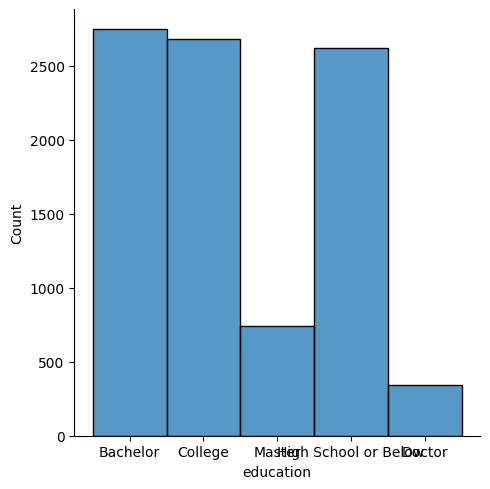

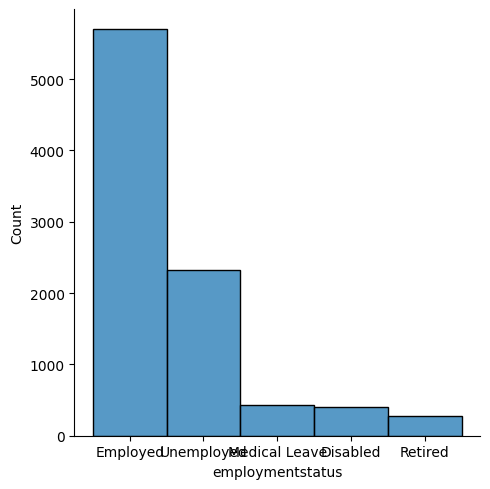

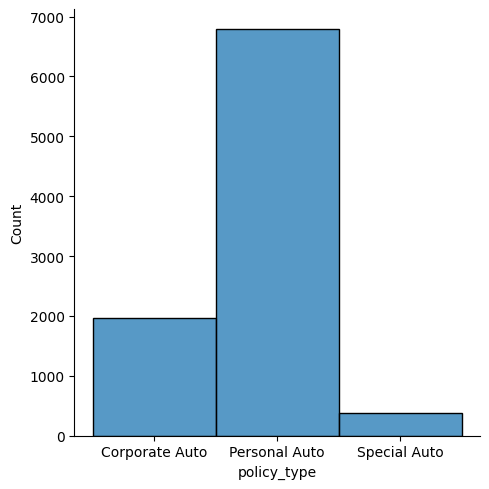

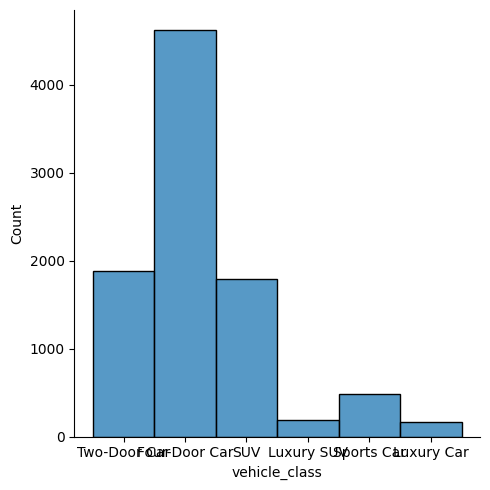

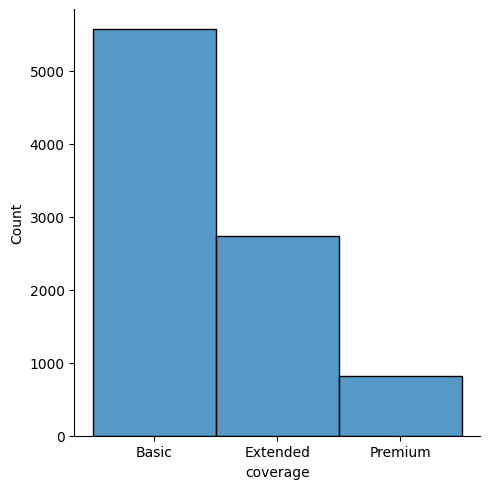

In [31]:
def distrPlots(categorical_df):          # distribution graphs for al categorical variables with large ranges
    sns.displot(categorical_df['education'])  
    plt.show()
    sns.displot(categorical_df['employmentstatus'])  
    plt.show()
    sns.displot(categorical_df['policy_type'])  
    plt.show()
    sns.displot(categorical_df['vehicle_class'])  
    plt.show()
    sns.displot(categorical_df['coverage'])  
    plt.show()
    #return discrete_df
distrPlots(categorical_df)



# Merging Categories

In [32]:
categorical_df['education'].replace({'Master': 'Graduate', 'Doctor':'Graduate'}, inplace = True)

In [33]:
categorical_df['employmentstatus'].replace({'Medical Leave': 'Special Status', 'Disabled': 'Special Status', 'Retired': 'Special Status'}, inplace = True)

In [34]:
categorical_df['policy_type'].replace({'Corporate Auto':'Corporate Auto', 'Special Auto':'Corporate Auto'}, inplace = True)

In [35]:
categorical_df['vehicle_class'].replace({'Sports Car': 'Posche Car', 'Luxury SUV': 'Posche Car', 'Luxury Car': 'Posche Car'}, inplace = True)

In [36]:
categorical_df['coverage'].replace({'Extended': 'Advanced', 'Premium': 'Advanced'}, inplace = True)

# Plots after Merging

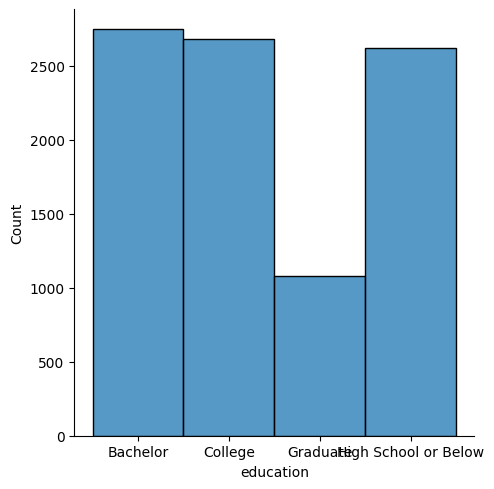

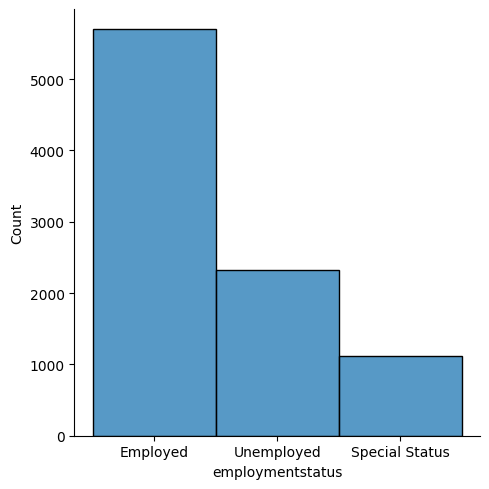

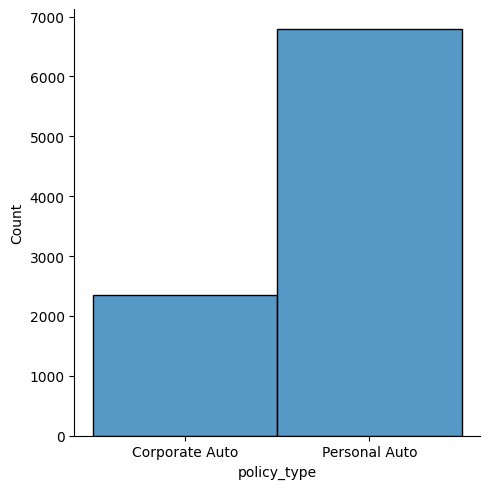

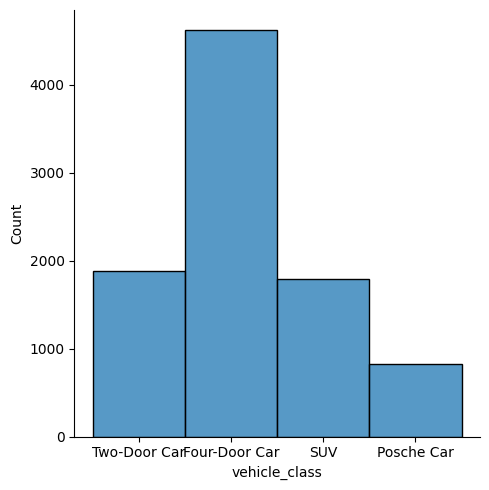

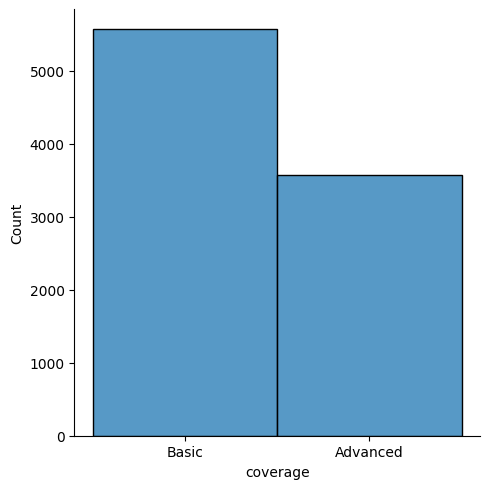

In [37]:
def distrPlots(categorical_df):          # distribution graphs for categorical variables after Merging
    sns.displot(categorical_df['education'])  
    plt.show()
    sns.displot(categorical_df['employmentstatus'])  
    plt.show()
    sns.displot(categorical_df['policy_type'])  
    plt.show()
    sns.displot(categorical_df['vehicle_class'])  
    plt.show()
    sns.displot(categorical_df['coverage'])  
    plt.show()
    #return discrete_df
distrPlots(categorical_df)



# Looking into policy type and policy, and Removing Redundancy

In [38]:
categorical_df['policy_type'].value_counts()           

policy_type
Personal Auto     6788
Corporate Auto    2346
Name: count, dtype: int64

In [39]:
categorical_df['policy'].value_counts()

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

Looking at both columns, it is clear that one column is a replication of the other. After succeding in redcing the 'policy_type' column into just two categories, is worthwhile to drop 'policy' column which is more complex.

In [40]:
categorical_df.drop(['policy'], axis = 1, inplace = True) # policy column is dropped


In [41]:
categorical_df['effective_to_date'] = file['effective_to_date'] # adding the date column to categorical data

In [42]:
categorical_df.to_csv('categorical.csv', index = False) # saving the data as csv

# Opening Save Categorical Data for Further Analysis

In [43]:
file1_cat = pd.read_csv('categorical.csv')
#file1_cat.drop(['effective_to_date'], axis = 1, inplace = False)

# Plot for all Categorical Data

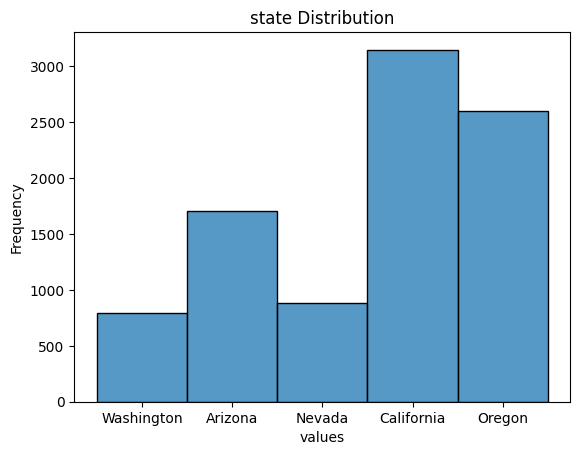

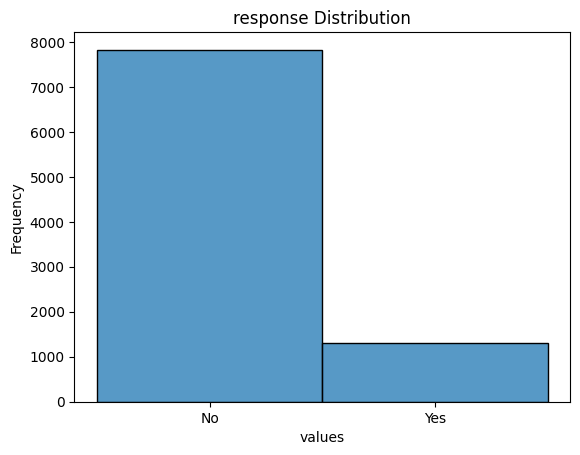

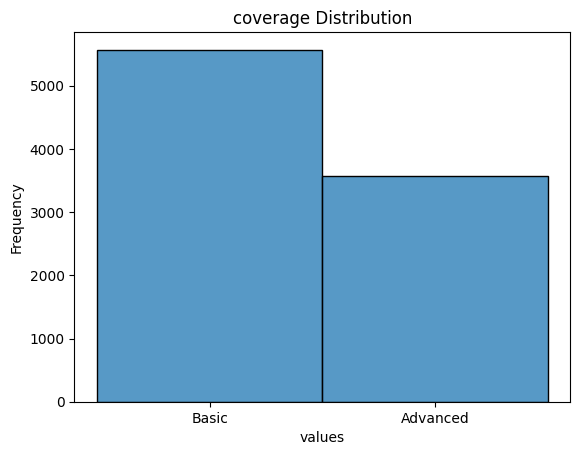

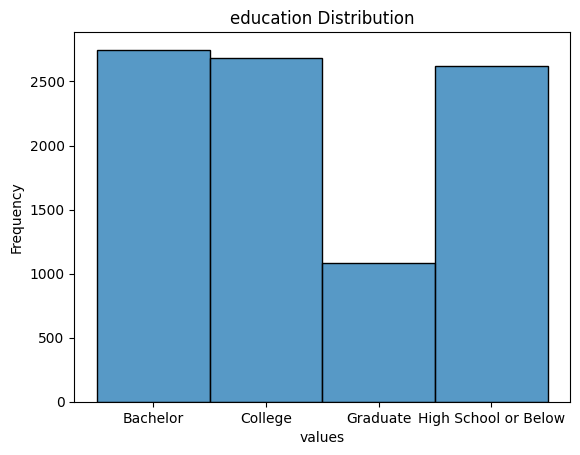

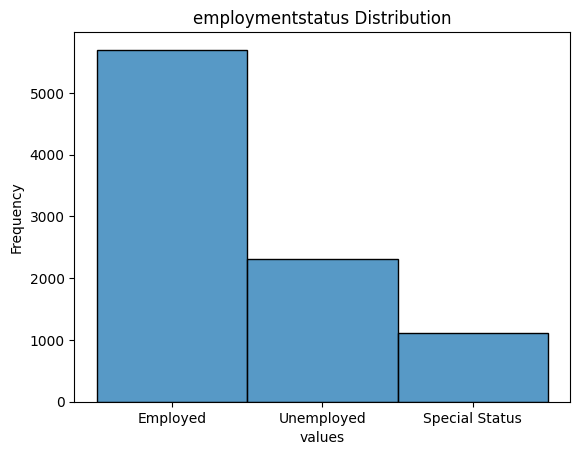

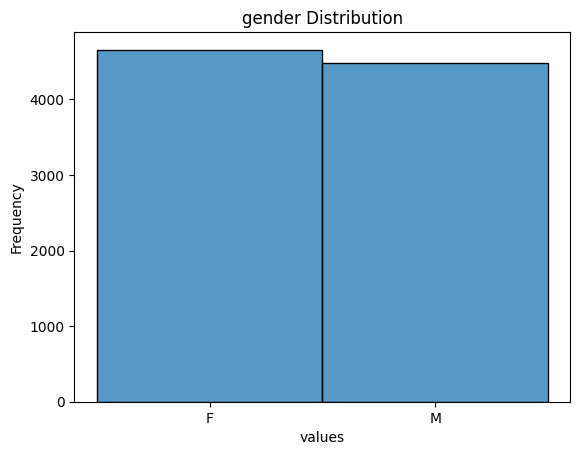

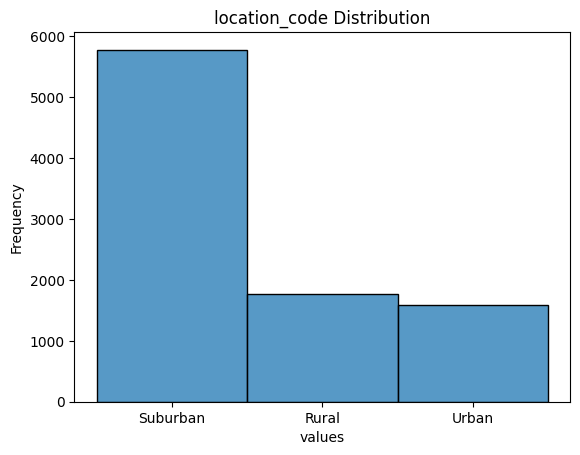

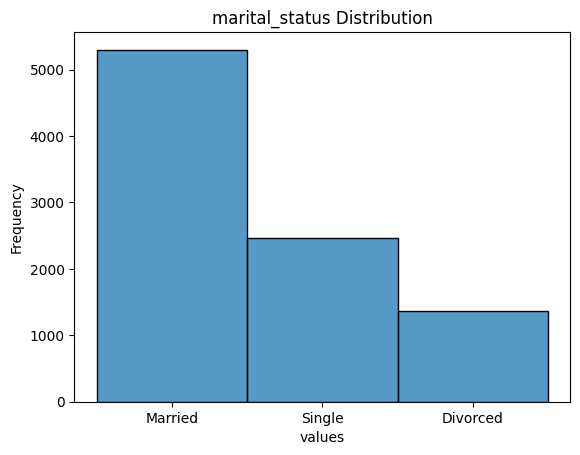

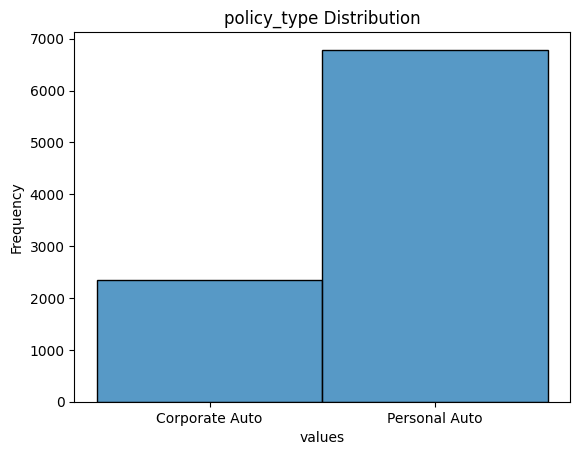

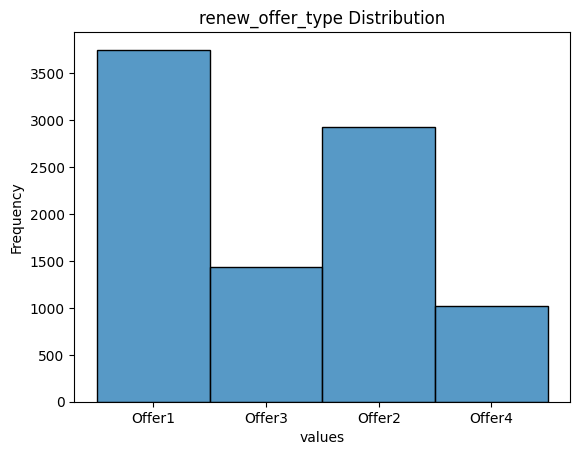

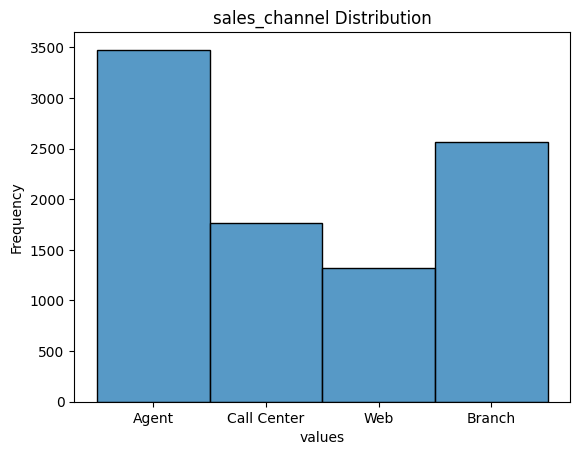

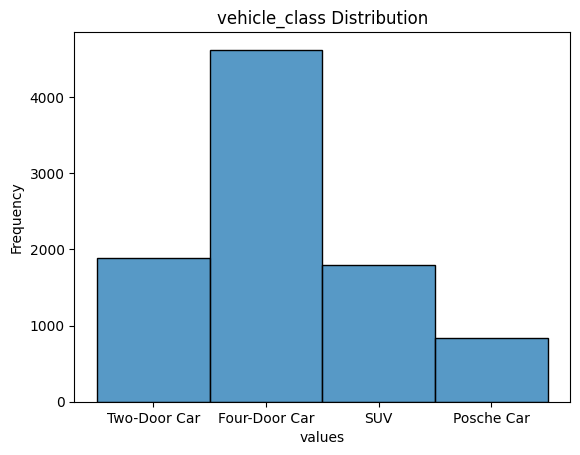

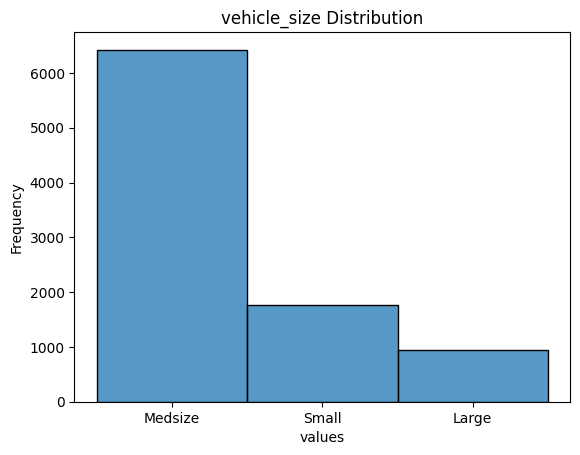

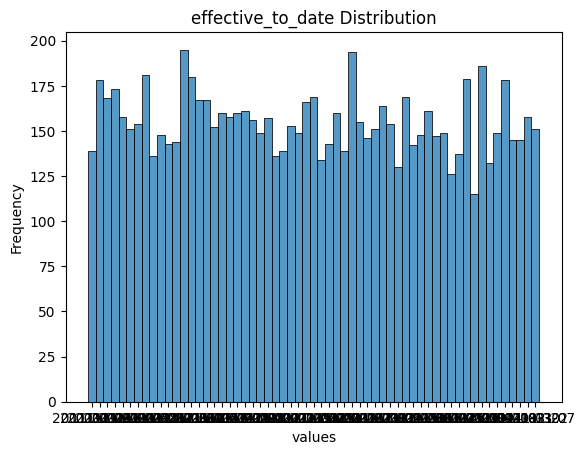

In [44]:
def histoPlot(file1_cat):
    for column in file1_cat.columns:
        sns.histplot(file1_cat[column])
        plt.xlabel('values')
        plt.ylabel('Frequency')
        plt.title(f'{column} Distribution')
        plt.show()
        
histoPlot(file1_cat)       

Not normally distributed, but outliers have been greatly reduced due to previous activities, however, more wrangling needs to be done.

In [45]:
file1_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-24
1,Arizona,No,Advanced,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,2011-01-31
2,Nevada,No,Advanced,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,2011-01-20
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2011-02-03


In [46]:
file1_cat.dtypes

state                object
response             object
coverage             object
education            object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
effective_to_date    object
dtype: object

No! Redundant data has been taken care of in previous steps

# Time Variable Plot

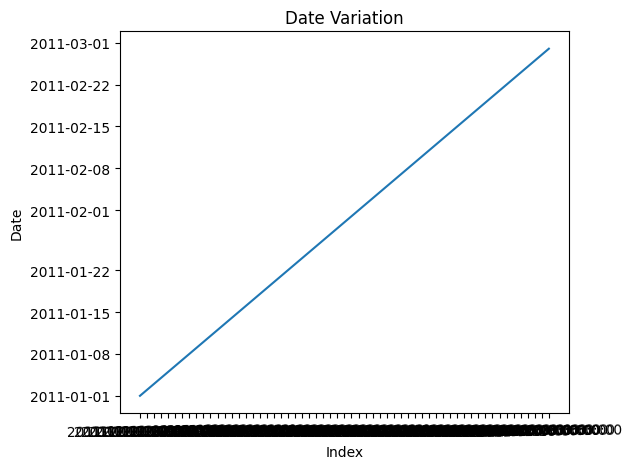

In [47]:

date_range = pd.date_range(start = min(file1_cat['effective_to_date']), end = max(file1_cat['effective_to_date']))
x_values = range(len(date_range))
plt.plot(date_range)
plt.xlabel('Index')
plt.ylabel('Date')
plt.title('Date Variation')
plt.xticks(x_values, date_range, rotation = 1)
plt.tight_layout()
plt.show()

# file1_cat =  file1_cat.sort_values(['effective_to_date'], ascending = True)
# plt.plot(df['effective_to_date'], file1_cat['count'])
# plt.xticks(rotation = 'vertical')


It assume a linear dimension suggesting a good fit for linear regression

# Splitting the Time Column into Day Month and year

In [48]:
file1_cat['day'] =file['effective_to_date'].dt.day
file1_cat['month'] = file['effective_to_date'].dt.month
file1_cat['year'] = file['effective_to_date'].dt.year



In [49]:
#file1_cat = file1_cat.drop('effective_to_date', axis = 1)

In [50]:
file1_cat.to_csv('categorical.csv', index = False)


In [51]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')

In [52]:
numerical
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,day,month,year
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-24,24,2,2011
1,Arizona,No,Advanced,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,2011-01-31,31,1,2011
2,Nevada,No,Advanced,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-19,19,2,2011
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,2011-01-20,20,1,2011
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2011-02-03,3,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,2011-02-10,10,2,2011
9130,California,Yes,Advanced,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2011-02-12,12,2,2011
9131,California,No,Advanced,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2011-02-06,6,2,2011
9132,California,No,Advanced,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,2011-02-03,3,2,2011


In [53]:
categorical.dtypes

state                object
response             object
coverage             object
education            object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
effective_to_date    object
day                   int64
month                 int64
year                  int64
dtype: object

In [54]:
categorical["day"]=categorical["day"].astype(object)
categorical["month"]=categorical["month"].astype(object)
categorical["year"]=categorical["year"].astype(object)

In [55]:
data = pd.concat([numerical, categorical], axis=1)
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,day,month,year
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-24,24,2,2011
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,2011-01-31,31,1,2011
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-19,19,2,2011
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,2011-01-20,20,1,2011
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2011-02-03,3,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,California,No,...,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,2011-02-10,10,2,2011
9130,3096.511217,21604,79,14,28,0,1,379.200000,California,Yes,...,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2011-02-12,12,2,2011
9131,8163.890428,0,85,9,37,3,2,790.784983,California,No,...,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2011-02-06,6,2,2011
9132,7524.442436,21941,96,34,3,0,3,691.200000,California,No,...,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,2011-02-03,3,2,2011


# Splitting the Data for prediction

In [56]:
from sklearn.model_selection import train_test_split # importing relevant libraries

In [57]:
y = data['total_claim_amount']                     # splitting data into X and y variables
X = data.drop(['total_claim_amount'], axis=1) 
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # train_test_split

In [59]:
X_train_num = X_train.select_dtypes(include = np.number)    # categorizing splits into numerical and categorical sets
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# Scaling and Encoding

In [60]:
from sklearn.preprocessing import MinMaxScaler        # applying the minmaxscaler on the nuerical training set to even the variables

transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.038280,0.485762,0.292373,0.342857,0.151515,0.0,0.000
1,0.039929,0.268821,0.296610,0.142857,0.020202,0.0,0.000
2,0.036927,0.129045,0.330508,0.085714,0.515152,0.0,0.000
3,0.081208,0.000000,0.254237,0.142857,0.949495,0.0,0.875
4,0.016954,0.702603,0.093220,0.371429,0.191919,0.2,0.000


In [61]:
X_train_scaled.isna().sum()    # checking for NANs to ensure they don't exist

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler  # applying the minmaxscaler on the nuerical test set to even the variables

transformer = MinMaxScaler().fit(X_test_num) 
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.032581,0.746148,0.189873,0.028571,0.494949,0.0,0.000
1,0.050691,0.232273,0.042194,0.200000,0.101010,0.0,0.375
2,0.026770,0.949410,0.139241,0.085714,0.383838,0.0,0.000
3,0.084346,0.771839,0.160338,0.085714,0.272727,0.2,0.500
4,0.084582,0.237785,0.033755,0.514286,0.141414,0.0,0.125


In [63]:
X_test_scaled.isna().sum()  # checking for NaNs

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [64]:
X_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,day,month,year
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-24,24,2,2011
1,Arizona,No,Advanced,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,2011-01-31,31,1,2011
2,Nevada,No,Advanced,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2011-02-19,19,2,2011
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,2011-01-20,20,1,2011
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2011-02-03,3,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,2011-02-10,10,2,2011
9130,California,Yes,Advanced,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2011-02-12,12,2,2011
9131,California,No,Advanced,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2011-02-06,6,2,2011
9132,California,No,Advanced,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,2011-02-03,3,2,2011


In [65]:
X_cat.isna().sum()     # checking for NaNs

state                0
response             0
coverage             0
education            0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
effective_to_date    0
day                  0
month                0
year                 0
dtype: int64

In [66]:
X_train_cat1 = X_train_cat[['coverage', 'employmentstatus', 'location_code', 'vehicle_size', 'education']]  # # select test sets for dummy encoding
X_test_cat1 = X_test_cat[['coverage', 'employmentstatus', 'location_code', 'vehicle_size', 'education']]
X_train_cat2 = X_train_cat[['state','marital_status', 'policy_type', 'sales_channel', 'response','gender','year','day','month']]
X_test_cat2 = X_test_cat[['state','marital_status', 'policy_type', 'sales_channel', 'response','gender','year','day','month']]

In [67]:
X_train_catordinal = pd.get_dummies(X_train_cat1)  # dummy encoding the select sets
X_test_catordinal = pd.get_dummies(X_test_cat1)

In [68]:
X_test_catordinal.isna().sum()  # checking for NaNs

coverage_Advanced                  0
coverage_Basic                     0
employmentstatus_Employed          0
employmentstatus_Special Status    0
employmentstatus_Unemployed        0
location_code_Rural                0
location_code_Suburban             0
location_code_Urban                0
vehicle_size_Large                 0
vehicle_size_Medsize               0
vehicle_size_Small                 0
education_Bachelor                 0
education_College                  0
education_Graduate                 0
education_High School or Below     0
dtype: int64

In [69]:
X_train_catordinal.isna().sum()     #checking for NaNs

coverage_Advanced                  0
coverage_Basic                     0
employmentstatus_Employed          0
employmentstatus_Special Status    0
employmentstatus_Unemployed        0
location_code_Rural                0
location_code_Suburban             0
location_code_Urban                0
vehicle_size_Large                 0
vehicle_size_Medsize               0
vehicle_size_Small                 0
education_Bachelor                 0
education_College                  0
education_Graduate                 0
education_High School or Below     0
dtype: int64

In [70]:
X_test_catordinal.isna().sum()  # checking for NaNs

coverage_Advanced                  0
coverage_Basic                     0
employmentstatus_Employed          0
employmentstatus_Special Status    0
employmentstatus_Unemployed        0
location_code_Rural                0
location_code_Suburban             0
location_code_Urban                0
vehicle_size_Large                 0
vehicle_size_Medsize               0
vehicle_size_Small                 0
education_Bachelor                 0
education_College                  0
education_Graduate                 0
education_High School or Below     0
dtype: int64

In [71]:
from sklearn.preprocessing import OneHotEncoder                 # applying onwhot encoding on the other categorical training sets
encoder = OneHotEncoder(drop='first').fit(X_train_cat2)
encoded_cat = encoder.transform(X_train_cat2).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat2.columns)

onehot_encoded_train = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded_train.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_2
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
from sklearn.preprocessing import OneHotEncoder           #  # applying onwhot encoding on the other categorical test sets
encoder = OneHotEncoder(drop='first').fit(X_test_cat2)
encoded_cat = encoder.transform(X_test_cat2).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat2.columns)

onehot_encoded_test = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded_test.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_2
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
X_train_catordinal = X_train_catordinal.reset_index(drop=True)          # resetiing train encoded sets to avoid misalighnment when concatenating
onehot_encoded_train = onehot_encoded_train.reset_index(drop=True)

In [74]:
data1 = pd.concat([X_train_catordinal, onehot_encoded_train], axis=1)     # concatenating dummy and onehot encoded train sets

In [75]:
X_test_catordinal = X_test_catordinal.reset_index(drop=True)  # resetiing test encoded sets to avoid misalighnment when concatenating
onehot_encoded_test = onehot_encoded_test.reset_index(drop=True)

In [76]:
data2 = pd.concat([X_test_catordinal, onehot_encoded_test], axis=1)  # concatenating dummy and onehot encoded train sets

In [77]:
X_num.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
dtype: object

# Linear Regression Model

In [78]:
X_train_scaled = X_train_scaled.reset_index(drop=True)   # resetiing train scaled sets to avoid misalighnment when concatenating
X_test_scaled = X_test_scaled.reset_index(drop=True)

In [79]:
X_train_scaled_encoded = pd.concat([X_train_scaled, data1], axis=1)  # concatenating train_scaled and train_encoded sets 

In [80]:
X_train_scaled_encoded.shape

(6393, 65)

In [81]:
X_test_scaled_encoded = pd.concat([X_test_scaled, data2], axis=1)  # concatenating test_scaled and test_encoded sets

In [82]:
X_train_scaled_encoded.isna().sum() # checking for NaNs

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
                                ..
day_28                           0
day_29                           0
day_30                           0
day_31                           0
month_2                          0
Length: 65, dtype: int64

In [83]:
X_test_scaled_encoded.isna().sum()    # checking for NaNs

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
                                ..
day_28                           0
day_29                           0
day_30                           0
day_31                           0
month_2                          0
Length: 65, dtype: int64

In [84]:
from sklearn.linear_model import LogisticRegression    # importing and applying the linear model 
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_scaled_encoded,y_train)

LinearRegression()

In [85]:
from sklearn.metrics import r2_score           # r2_score metrics
predictions = lm.predict(X_train_scaled_encoded)
r2_score(y_train, predictions)

0.7727415225945811

In [86]:
y_train             # target

434      624.000000
4641     628.800000
4952     667.200000
1489     871.200000
812      141.799422
           ...     
5734     308.321335
5191     350.400000
5390    1059.572464
860      667.200000
7270     344.015386
Name: total_claim_amount, Length: 6393, dtype: float64

In [87]:
predictions               # prdiction 

array([710.625, 679.875, 689.   , ..., 839.125, 793.125, 312.625])

In [88]:
predictions_test = lm.predict(X_train_scaled_encoded)   # r2_score for the prediction
r2_score(y_train, predictions_test)

0.7727415225945811

In [89]:
lm = linear_model.LinearRegression()     # linear model
lm.fit(X_test_scaled_encoded,y_test)

LinearRegression()

In [90]:
predictions = lm.predict(X_test_scaled_encoded)   # r2_score for the test
r2_score(y_test, predictions)

0.7764467180963877

In [91]:
y_test      # target for the test

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4271    518.400000
7923    650.521790
5633    652.800000
8432    150.878447
681     452.616872
Name: total_claim_amount, Length: 2741, dtype: float64

In [92]:
predictions             #  prediction for the test

array([223.5, 451. , 433.5, ..., 680.5, 118.5, 544.5])

In [93]:
predictions_test = lm.predict(X_test_scaled_encoded)    #r2_score for the test
r2_score(y_test, predictions_test)

0.7764467180963877

In [94]:
from sklearn.neighbors import KNeighborsRegressor     # function to check prediction using nearest neighbour
def checkknnregressor(n):
    
    KNN = KNeighborsRegressor(n_neighbors = n)
    KNN.fit(X_train_scaled_encoded, y_train)

    score = KNN.score(X_train_scaled_encoded, y_train)
    
    print("Train score is ", score)
    
    score_test = KNN.score(X_test_scaled_encoded, y_test)
    print("Test score is ", score_test)

In [95]:
checkknnregressor(10)

Train score is  0.5816014797233411
Test score is  0.5050091856249856


In [96]:
checkknnregressor(50)

Train score is  0.5184794615703892
Test score is  0.5115007544813268


In [97]:
checkknnregressor(100)

Train score is  0.49843541287525417
Test score is  0.4973761123278787


In [98]:
checkknnregressor(6307)

Train score is  0.010096292131608342
Test score is  0.010482682245164132


In [99]:
from sklearn import linear_model                     # function to check prediction using linear regression
from sklearn.metrics import r2_score

def checklinear_model():
    LR = linear_model.LinearRegression()
    LR.fit(X_train_scaled_encoded, y_train)
    LR.fit(X_test_scaled_encoded, y_test)
    
    predictions_train = LR.predict(X_train_scaled_encoded)
    predictions_test = LR.predict(X_test_scaled_encoded)
    
    score_train = r2_score(predictions_train, y_train)
    print("Train score is ", score_train)
    score_test = r2_score(predictions_test, y_test)
    print("Test score is ", score_test)

In [100]:
checklinear_model()

Train score is  0.6846967496263829
Test score is  0.7118769907385742


In [101]:
from sklearn.neural_network import MLPRegressor           # function to check prediction using MLPRegressor
def checkmlpregressor(n):
    
    regr = MLPRegressor(max_iter = n).fit(X_train_scaled_encoded, y_train)

    score_test = regr.score(X_test_scaled_encoded, y_test)
    display("Test score ", score_test)

    score = regr.score(X_train_scaled_encoded, y_train)
    display("Train score ", score)

In [102]:
checkmlpregressor(400)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


'Test score '

0.807364995106691

'Train score '

0.8282899611369153

# The Random Varibles Distribution

In [103]:
numerical1 = _numerical_df_['customer_lifetime_value']   # calculating the mean and standard deviation
num_mean = np.mean(numerical1) 
num_std_dev = np.std(numerical1)


In [104]:
x_axis = np.linspace(min(numerical1), max(numerical1), 100)       # calculating the probability density function
pdf = (1/(num_std_dev * np.sqrt(2 * np.pi))) * np.exp(- ((x_axis - num_mean) ** 2)/(2 * num_std_dev ** 2))

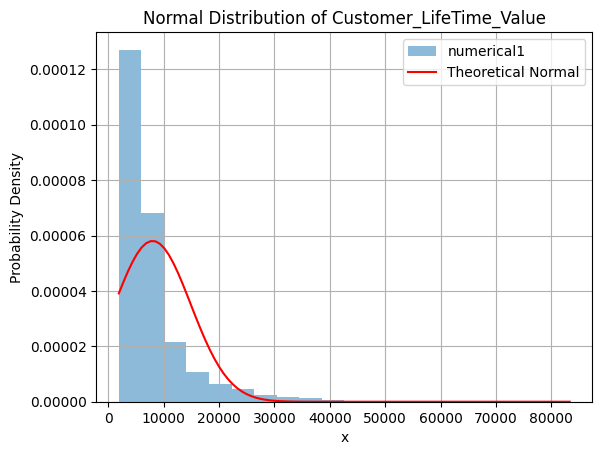

In [105]:
plt.hist(numerical1, bins = 20, density = True, alpha = 0.5, label = 'numerical1') # normal distribution trial plot 
plt.plot(x_axis, pdf, color = 'red', label ='Theoretical Normal')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Customer_LifeTime_Value')
plt.legend()
plt.grid(True)
plt.show()

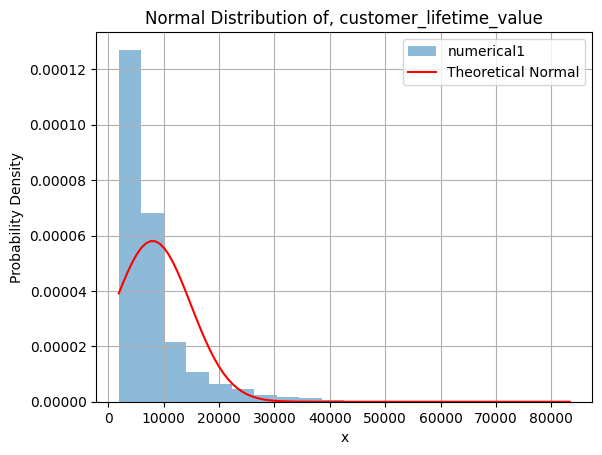

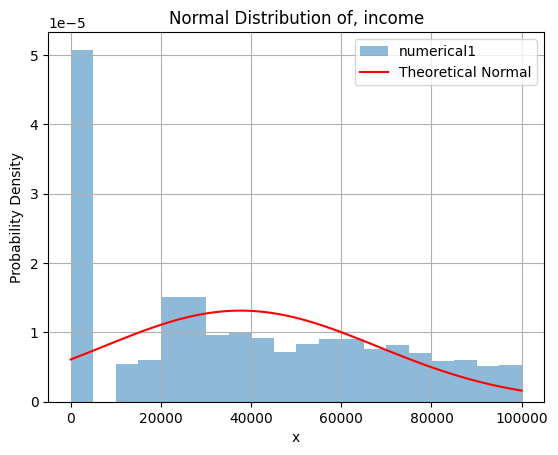

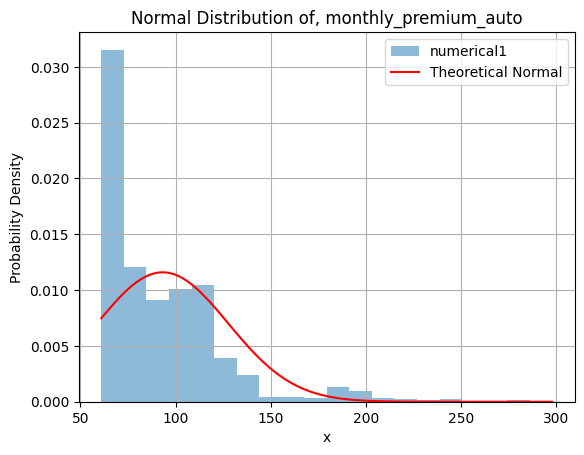

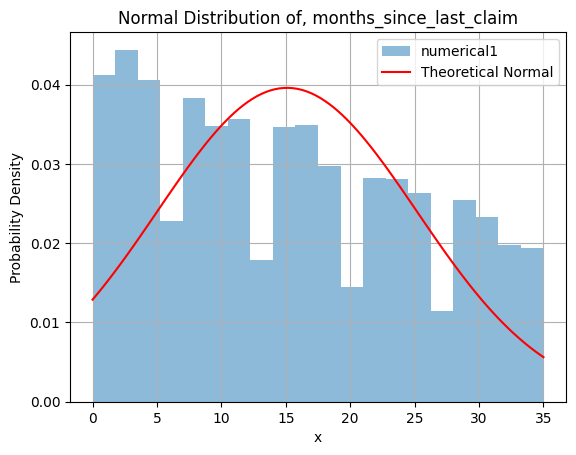

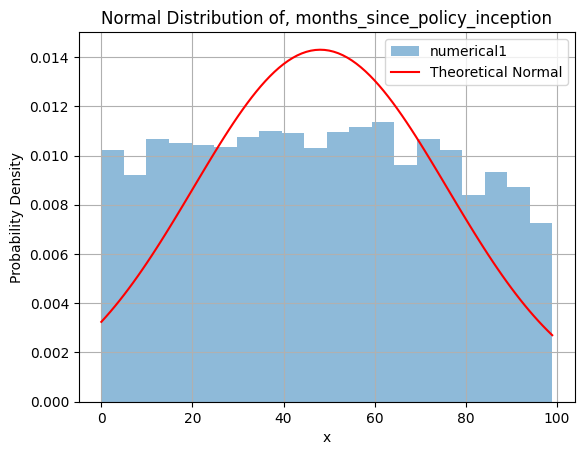

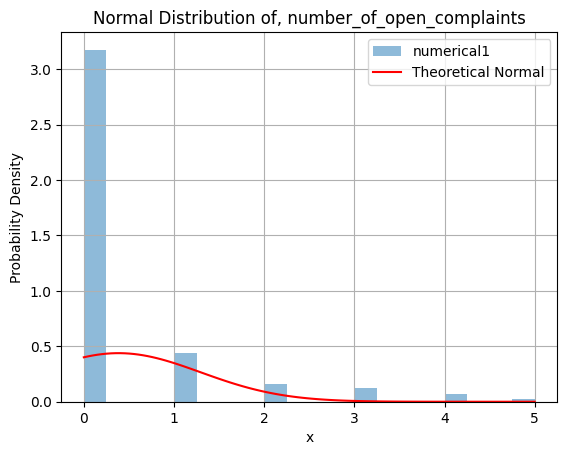

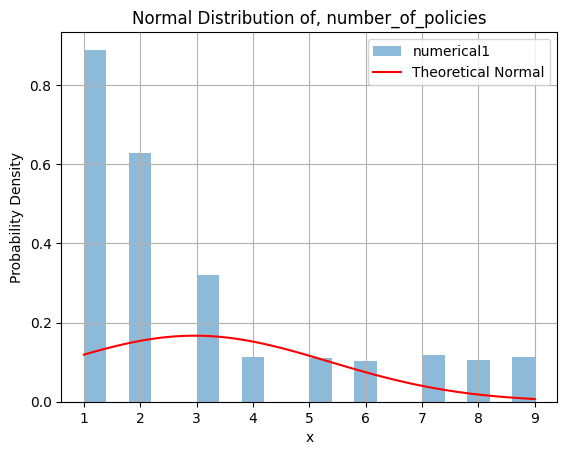

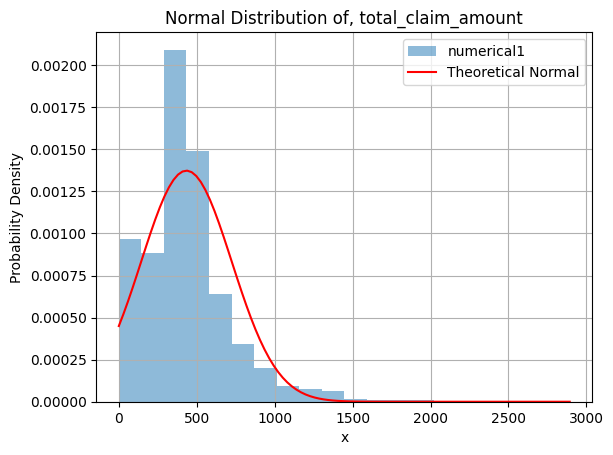

In [106]:
# Theoreticla Normal distribution plots for all columns
for column in _numerical_df_.columns:
    numerical1 = _numerical_df_[column]
    
    num_mean = np.mean(numerical1) 
    num_std_dev = np.std(numerical1)
    
    x_axis = np.linspace(min(numerical1), max(numerical1), 100)
    pdf = (1/(num_std_dev * np.sqrt(2 * np.pi))) * np.exp(- ((x_axis - num_mean) ** 2)/(2 * num_std_dev ** 2))
    
    plt.hist(numerical1, bins = 20, density = True, alpha = 0.5, label = 'numerical1')
    plt.plot(x_axis, pdf, color = 'red', label ='Theoretical Normal')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title(f'Normal Distribution of, {column}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
#     def chartPlots(continuous_df):               # distribution plots for continuous data
#     for column in continuous_df.columns:
#         sns.displot(continuous_df[column])
#         plt.xlabel(column)
#         plt.ylabel(column)
#         plt.title(f'Distribution of {column}')
#         plt.show()
        
# chartPlots(continuous_df)
    

The data is largely skewed and looks to align largely with exponential distribution

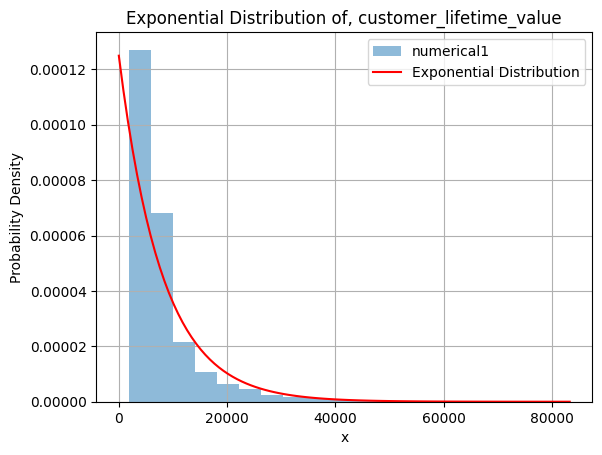

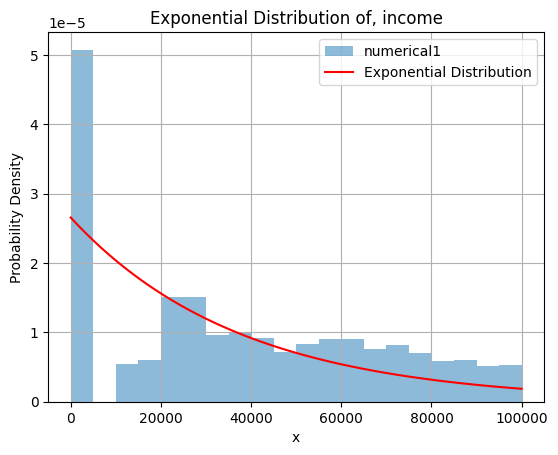

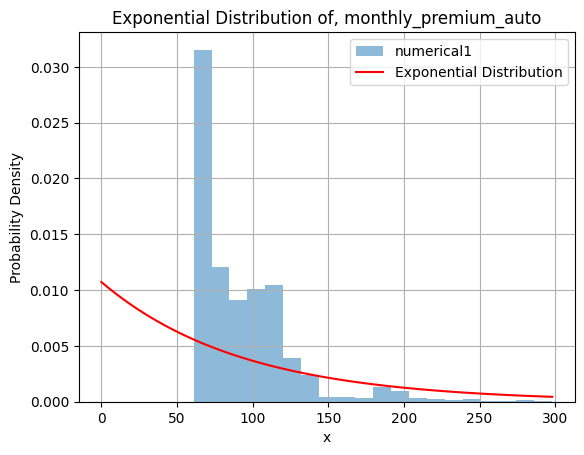

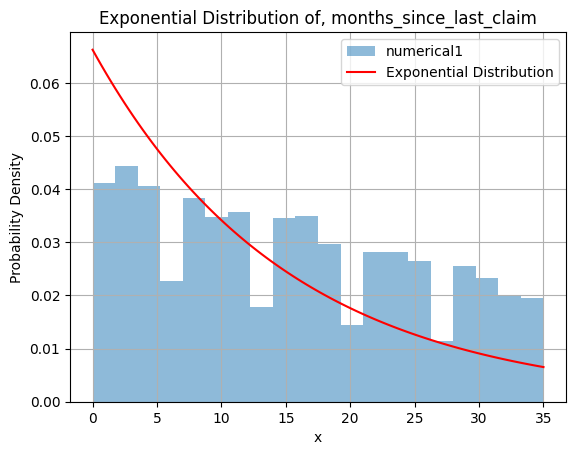

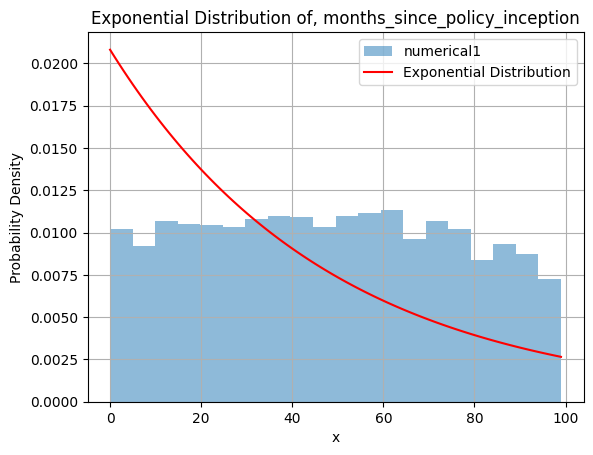

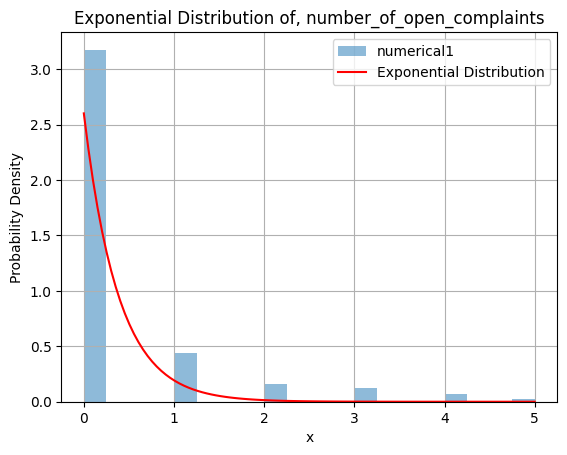

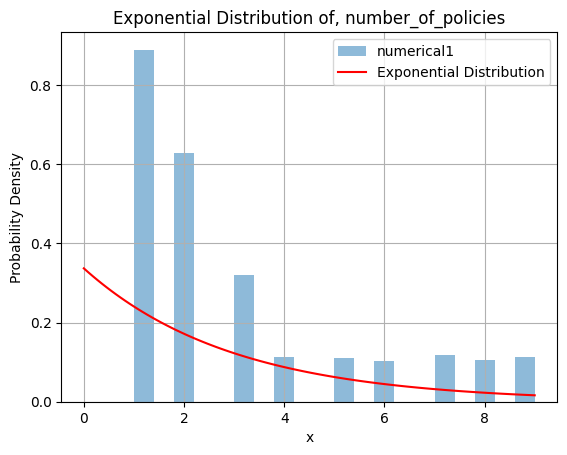

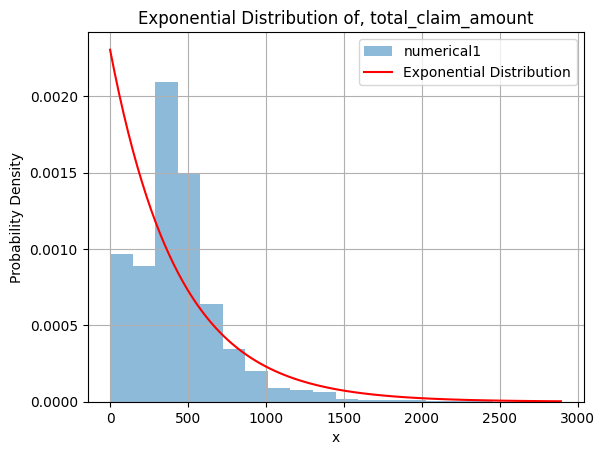

In [107]:
# exponential distribution plots for all columns
for column in _numerical_df_.columns:
    numerical1 = _numerical_df_[column]
    
    rate_param = 1 / np.mean(numerical1)
    num_mean = np.mean(numerical1) 
    num_std_dev = np.std(numerical1)
    
    x_axis = np.linspace(0, max(numerical1), 100)
    pdf = rate_param  * np.exp(-rate_param * x_axis)
    
    plt.hist(numerical1, bins = 20, density = True, alpha = 0.5, label = 'numerical1')
    plt.plot(x_axis, pdf, color = 'red', label ='Exponential Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title(f'Exponential Distribution of, {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

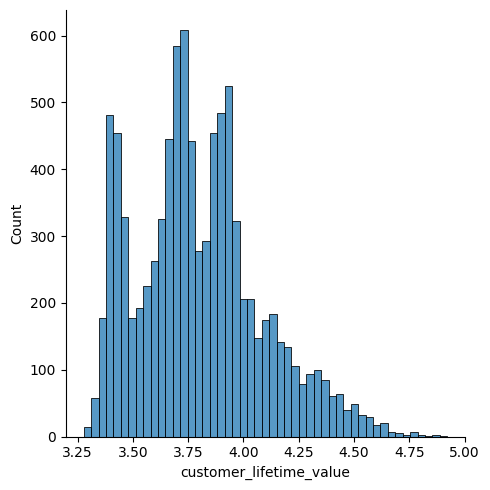

In [108]:
# Log10 tranformation improve normality for customer_lifetime_value
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
AVGGIFT_log = _numerical_df_['customer_lifetime_value'].apply(log_transfom_clean1)
sns.displot(AVGGIFT_log)
plt.show()


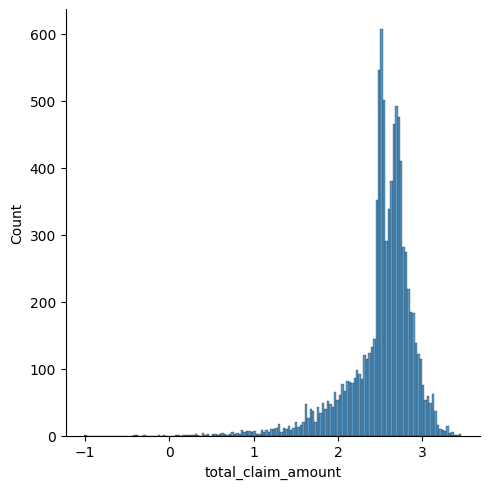

In [109]:
def log_transfom_clean1(x): # Log10 tranformation improve normality for total_claim_amount
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

AVGGIFT_log = _numerical_df_['total_claim_amount'].apply(log_transfom_clean1)
sns.displot(AVGGIFT_log)
plt.show()


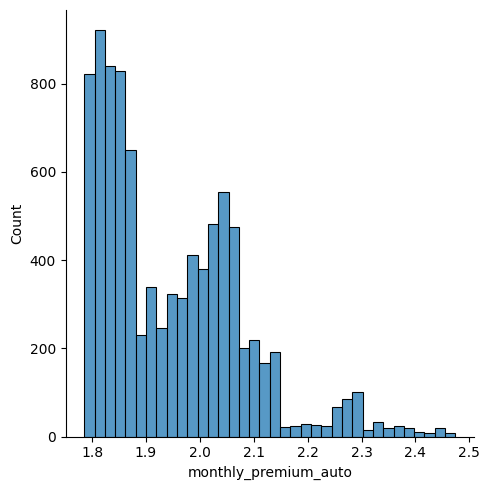

In [110]:
def log_transfom_clean1(x): # Log10 tranformation improve normality for monthly_premium_auto
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

AVGGIFT_log = _numerical_df_['monthly_premium_auto'].apply(log_transfom_clean1)
sns.displot(AVGGIFT_log)
plt.show()

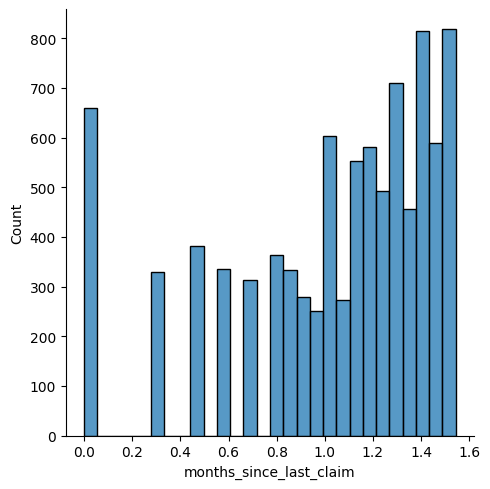

In [111]:
def log_transfom_clean1(x): # Log10 tranformation improve normality for months_since_last_claim
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

AVGGIFT_log = _numerical_df_['months_since_last_claim'].apply(log_transfom_clean1)
sns.displot(AVGGIFT_log)
plt.show()

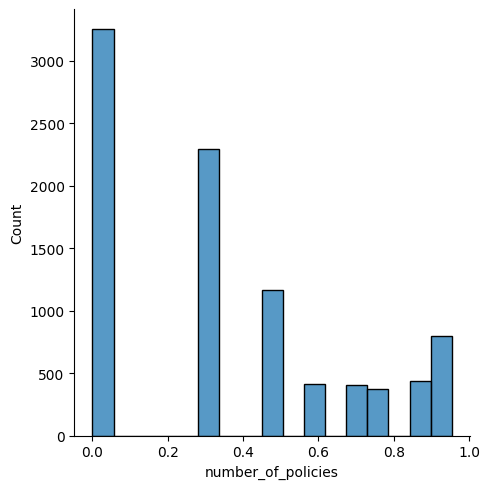

In [112]:
def log_transfom_clean1(x): # Log10 tranformation improve normality for number_of_policies
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

AVGGIFT_log = _numerical_df_['number_of_policies'].apply(log_transfom_clean1)
sns.displot(AVGGIFT_log)
plt.show()

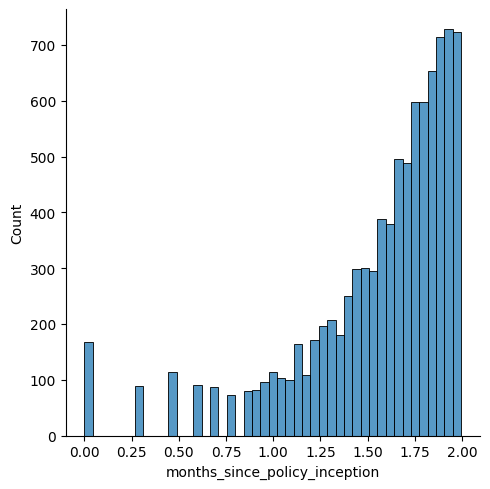

In [113]:
def log_transfom_clean1(x): # Log10 tranformation improve normality for months_since_policy_inception
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

AVGGIFT_log = _numerical_df_['months_since_policy_inception'].apply(log_transfom_clean1)
sns.displot(AVGGIFT_log)
plt.show()

The impact of the log transform is visible only on the continuous data, discrete data is not affected by the log transform.